In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [146]:
#loading the data
diabetic_data = pd.read_csv(r'C:\Users\aasha\Downloads\diabetes+130-us+hospitals+for+years+1999-2008 (1)\diabetic_data.csv')

In [148]:
#we want to check the info to get an idea about the data
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [150]:
#first 5 rows will give us a better idea about the dataset
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [152]:
#finding the missing the missing values
missing = pd.concat([diabetic_data.isnull().sum(), 100 * diabetic_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
encounter_id,0,0.000000
nateglinide,0,0.000000
glimepiride,0,0.000000
acetohexamide,0,0.000000
glipizide,0,0.000000
glyburide,0,0.000000
tolbutamide,0,0.000000
pioglitazone,0,0.000000


In [154]:
#checking the categorical features
diabetic_data.select_dtypes(include = 'object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,MC,?,250.13,291,458,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,MC,?,560,276,787,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),?,MC,?,38,590,296,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,MC,Surgery-General,996,285,998,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [156]:
#replacing '?' with NaN
diabetic_data.replace('?', np.nan, inplace=True)

In [158]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [160]:
#handling the missing values with 0s
diabetic_data.fillna(0, inplace=True)

In [162]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),0,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),0,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),0,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),0,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),0,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [164]:
#checking the columns
diabetic_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [166]:
#dropping the unnecessary columns
diabetic_data.drop(['encounter_id', 'patient_nbr', 'admission_source_id', 'payer_code', 'max_glu_serum', 'A1Cresult', 'weight'], axis =1, inplace = True)

In [168]:
diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,3,0,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,2,0,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,1,0,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [170]:
#seeing the detailed dataset
diabetic_data.describe

<bound method NDFrame.describe of                    race  gender      age  admission_type_id  \
0             Caucasian  Female   [0-10)                  6   
1             Caucasian  Female  [10-20)                  1   
2       AfricanAmerican  Female  [20-30)                  1   
3             Caucasian    Male  [30-40)                  1   
4             Caucasian    Male  [40-50)                  1   
...                 ...     ...      ...                ...   
101761  AfricanAmerican    Male  [70-80)                  1   
101762  AfricanAmerican  Female  [80-90)                  1   
101763        Caucasian    Male  [70-80)                  1   
101764        Caucasian  Female  [80-90)                  2   
101765        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id  time_in_hospital         medical_specialty  \
0                             25                 1  Pediatrics-Endocrinology   
1                              1                 

In [172]:
#checking the total number of nan values
diabetic_data.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipto

In [178]:
#checking for unique values for race and medical specialty
print(diabetic_data['race'].unique())
print(diabetic_data['medical_specialty'].unique())

['Caucasian' 'AfricanAmerican' 0 'Other' 'Asian' 'Hispanic']
['Pediatrics-Endocrinology' 0 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery-General' 'Orthopedics' 'Gastroenterology'
 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunolo

In [180]:
#checking for null values in race and medical specialty
diabetic_data[['race', 'medical_specialty']].isna().sum()

race                 0
medical_specialty    0
dtype: int64

In [182]:
diabetic_data['race'].fillna('Unknown', inplace=True)
diabetic_data['medical_specialty'].fillna('Unknown', inplace=True)

C:\Users\aasha\AppData\Local\Temp\ipykernel_29608\3226308642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetic_data['race'].fillna('Unknown', inplace=True)
C:\Users\aasha\AppData\Local\Temp\ipykernel_29608\3226308642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [184]:
diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,3,0,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,2,0,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,1,0,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [186]:
diabetic_data.duplicated().sum()

0

In [188]:
diabetic_data.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose            

In [192]:
#checking for inconsistencies
diabetic_data['gender'].value_counts()
diabetic_data['race'].unique()
diabetic_data['change'].value_counts()

change
No    54755
Ch    47011
Name: count, dtype: int64

In [194]:
#fix the issue from 'Ch' to 'Yes'
diabetic_data['change'] = diabetic_data['change'].replace({'Ch': 'Yes'})
diabetic_data['change'].value_counts()

change
No     54755
Yes    47011
Name: count, dtype: int64

In [196]:
diabetic_data.duplicated().sum()

0

In [198]:
#checking for inconsistencies
diabetic_data['readmitted'].value_counts()
diabetic_data['diabetesMed'].value_counts()

diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64

In [200]:
#checking the random samples
diabetic_data.sample(4)

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
47748,Caucasian,Female,[70-80),1,6,3,0,39,0,13,...,No,No,No,No,No,No,No,No,Yes,>30
78356,Caucasian,Male,[60-70),2,3,9,Emergency/Trauma,51,2,10,...,No,No,No,No,No,No,No,No,No,NO
95554,Caucasian,Female,[80-90),2,3,6,Emergency/Trauma,1,2,15,...,No,Up,No,No,No,No,No,Yes,Yes,NO
3056,Caucasian,Male,[60-70),1,6,10,Cardiology,84,6,28,...,No,No,No,No,No,No,No,Yes,Yes,>30


In [202]:
#maintaining consistency in letters, whitespace and capitalization is important so we use str.strip.capitalize 
diabetic_data['readmitted'] = diabetic_data['readmitted'].str.strip().str.capitalize()
diabetic_data.head(4)

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,3,0,59,0,18,...,No,Up,No,No,No,No,No,Yes,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Male,[30-40),1,1,2,0,44,1,16,...,No,Up,No,No,No,No,No,Yes,Yes,No


In [204]:
# Mapping age ranges to a representative value
age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
diabetic_data['age'] = diabetic_data['age'].map(age_mapping)
diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,15,1,1,3,0,59,0,18,...,No,Up,No,No,No,No,No,Yes,Yes,>30
2,AfricanAmerican,Female,25,1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Male,35,1,1,2,0,44,1,16,...,No,Up,No,No,No,No,No,Yes,Yes,No
4,Caucasian,Male,45,1,1,1,0,51,0,8,...,No,Steady,No,No,No,No,No,Yes,Yes,No


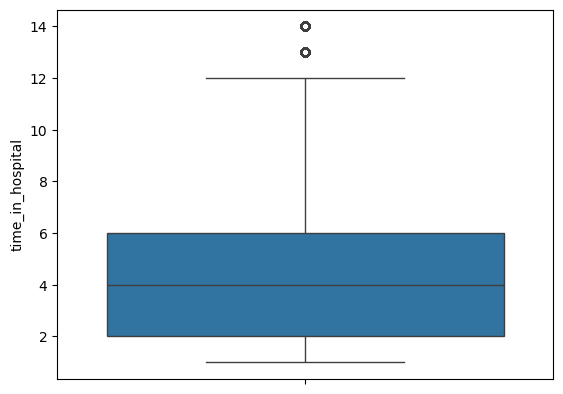

In [206]:
#checking for outliers
sns.boxplot(data = diabetic_data['time_in_hospital'])
plt.show()

In [208]:
#saving the cleaned data
diabetic_data.to_csv('cleaned_diabetic_data.csv', index=False)